In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation
import libpysal as lps
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
allyearsgdf = gpd.read_file('clean_allyears311df.geojson')

In [3]:
allyearsgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,Year,x,y,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.838160,-122.251303,2019,-122.251303,37.838160,POINT (-122.25130 37.83816)
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,CCD1,15,37.850308,-122.225949,2019,-122.225949,37.850308,POINT (-122.22595 37.85031)
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,13,37.794280,-122.252180,2019,-122.252180,37.794280,POINT (-122.25218 37.79428)
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.807518,-122.178452,2019,-122.178452,37.807518,POINT (-122.17845 37.80752)
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.828107,-122.195666,2019,-122.195666,37.828107,POINT (-122.19567 37.82811)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,3353,37.746496,-122.202223,2012,-122.202223,37.746496,POINT (-122.20222 37.74650)
11172,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD5,3360,37.776080,-122.218851,2012,-122.218851,37.776080,POINT (-122.21885 37.77608)
11173,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD6,3387,37.778537,-122.175978,2012,-122.175978,37.778537,POINT (-122.17598 37.77854)
11174,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD3,3397,37.824268,-122.264544,2012,-122.264544,37.824268,POINT (-122.26454 37.82427)


In [4]:
closed_allyearsgdf = allyearsgdf[allyearsgdf['Time to Close']!='Open']

In [6]:
closed_allyearsgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,Year,x,y,geometry
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.838160,-122.251303,2019,-122.251303,37.838160,POINT (-122.25130 37.83816)
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,CCD1,15,37.850308,-122.225949,2019,-122.225949,37.850308,POINT (-122.22595 37.85031)
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,13,37.794280,-122.252180,2019,-122.252180,37.794280,POINT (-122.25218 37.79428)
5,926601,7/20/19 15:18,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,5,37.839213,-122.269099,2019,-122.269099,37.839213,POINT (-122.26910 37.83921)
6,924666,7/15/19 10:07,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD4,3,37.784598,-122.200131,2019,-122.200131,37.784598,POINT (-122.20013 37.78460)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,3353,37.746496,-122.202223,2012,-122.202223,37.746496,POINT (-122.20222 37.74650)
11172,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD5,3360,37.776080,-122.218851,2012,-122.218851,37.776080,POINT (-122.21885 37.77608)
11173,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD6,3387,37.778537,-122.175978,2012,-122.175978,37.778537,POINT (-122.17598 37.77854)
11174,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD3,3397,37.824268,-122.264544,2012,-122.264544,37.824268,POINT (-122.26454 37.82427)


<AxesSubplot:>

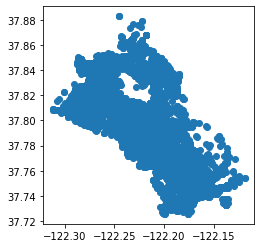

In [8]:
closed_allyearsgdf.plot()

In [9]:
blocks = gpd.read_file('Data/Alameda_Census_Blocks_2010.geojson')

<AxesSubplot:>

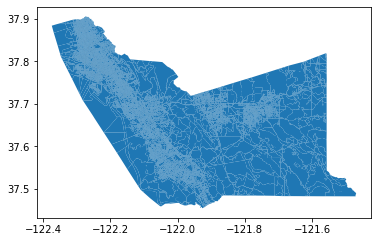

In [10]:
blocks.plot()

In [11]:
alljoinedgdf = gpd.sjoin(allyearsgdf, blocks, how="left")

In [12]:
alljoinedgdf

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,COUNCILDISTRICT,Time to Close,LAT,LONG,...,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD1,3,37.838160,-122.251303,...,+37.8390277,2002,0,S,1686,060014003002002,400300,-122.2513567,,001
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,CCD1,15,37.850308,-122.225949,...,+37.8520136,1058,0,S,124422,060014001001058,400100,-122.2261098,,001
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD2,13,37.794280,-122.252180,...,+37.7939228,3027,0,S,938,060014060003027,406000,-122.2518223,,001
3,917741,6/22/19 16:00,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.807518,-122.178452,...,+37.8138408,4010,0,S,1435012,060014046004010,404600,-122.1852490,,001
4,927190,7/22/19 16:17,SeeClickFix,Streets - Street Deterioration,STREETSW,OPEN,CCD4,Open,37.828107,-122.195666,...,+37.8276659,2006,0,S,37305,060014046002006,404600,-122.1945662,,001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11171,400913,3/15/12 10:48,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,CCD7,3353,37.746496,-122.202223,...,+37.7461949,2011,0,S,98632,060014090002011,409000,-122.2043845,,001
11172,410121,5/24/12 08:22,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD5,3360,37.776080,-122.218851,...,+37.7765412,2008,0,S,49905,060014072002008,407200,-122.2179899,,001
11173,406474,4/26/12 16:33,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,CCD6,3387,37.778537,-122.175978,...,+37.7783946,1001,0,S,75916,060014082001001,408200,-122.1745465,,001
11174,400297,3/11/12 16:27,Website,Streets - Potholes/Depression,STREETSW,CLOSED,CCD3,3397,37.824268,-122.264544,...,+37.8238070,3017,0,S,22730,060014011003017,401100,-122.2637676,,001


In [14]:
alljoinedgdf['geoid10'].value_counts()

060014045022007    47
060014044001003    47
060014044003019    37
060014047001002    36
060014045024015    36
                   ..
060014009002016     1
060014066011007     1
060014013003000     1
060014070003007     1
060014042001014     1
Name: geoid10, Length: 3506, dtype: int64

In [16]:
countdf = alljoinedgdf['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='counts')
print (countdf)

              geoid10  counts
0     060014045022007      47
1     060014044001003      47
2     060014044003019      37
3     060014047001002      36
4     060014045024015      36
...               ...     ...
3501  060014009002016       1
3502  060014066011007       1
3503  060014013003000       1
3504  060014070003007       1
3505  060014042001014       1

[3506 rows x 2 columns]


In [17]:
allblockcountgdf = blocks.merge(countdf,on='geoid10')
allblockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
0,06,G5040,,Block 2017,+37.7700438,2017,0,S,553,060014073002017,407300,-122.2099801,,001,"MULTIPOLYGON (((-122.21025 37.77010, -122.2101...",1
1,06,G5040,,Block 2002,+37.8010533,2002,0,S,2140,060014053012002,405301,-122.2543675,,001,"MULTIPOLYGON (((-122.25395 37.80253, -122.2541...",7
2,06,G5040,,Block 3007,+37.7949838,3007,0,S,11456,060014054013007,405401,-122.2521420,,001,"MULTIPOLYGON (((-122.25211 37.79567, -122.2519...",2
3,06,G5040,,Block 3018,+37.7926177,3018,0,S,828,060014058003018,405800,-122.2351255,,001,"MULTIPOLYGON (((-122.23551 37.79227, -122.2348...",1
4,06,G5040,,Block 3040,+37.7958179,3040,0,S,11944,060014060003040,406000,-122.2565619,,001,"MULTIPOLYGON (((-122.25743 37.79585, -122.2573...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,06,G5040,,Block 1009,+37.7862553,1009,0,S,12770,060014063001009,406300,-122.2227530,,001,"MULTIPOLYGON (((-122.22333 37.78688, -122.2231...",1
3502,06,G5040,,Block 2013,+37.7844475,2013,0,S,453,060014070002013,407000,-122.2004468,,001,"MULTIPOLYGON (((-122.20072 37.78427, -122.2007...",3
3503,06,G5040,,Block 1009,+37.7893294,1009,0,S,519,060014066011009,406601,-122.2081067,,001,"MULTIPOLYGON (((-122.20865 37.78903, -122.2075...",1
3504,06,G5040,,Block 1054,+37.7689713,1054,0,S,281,060014099001054,409900,-122.1534691,,001,"MULTIPOLYGON (((-122.15332 37.76868, -122.1536...",1


In [18]:
sorted_blockcountgdf = allblockcountgdf.sort_values(by='counts',ascending = False)
sorted_blockcountgdf

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts
2236,06,G5040,,Block 2007,+37.8332164,2007,0,S,176161,060014045022007,404502,-122.2114417,,001,"MULTIPOLYGON (((-122.20938 37.83483, -122.2094...",47
3464,06,G5040,,Block 1003,+37.8484530,1003,0,S,1158634,060014044001003,404400,-122.2186775,,001,"MULTIPOLYGON (((-122.22171 37.84543, -122.2219...",47
143,06,G5040,,Block 3019,+37.8452564,3019,0,S,269217,060014044003019,404400,-122.2015401,,001,"MULTIPOLYGON (((-122.19718 37.84507, -122.1970...",37
2878,06,G5040,,Block 4015,+37.8273103,4015,0,S,102849,060014045024015,404502,-122.2085940,,001,"MULTIPOLYGON (((-122.20626 37.82440, -122.2066...",36
2506,06,G5040,,Block 1002,+37.8136998,1002,0,S,395184,060014047001002,404700,-122.2116078,,001,"MULTIPOLYGON (((-122.21407 37.81247, -122.2144...",36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,06,G5040,,Block 2035,+37.8057367,2035,0,S,8890,060014028002035,402800,-122.2711773,,001,"MULTIPOLYGON (((-122.27149 37.80522, -122.2716...",1
2442,06,G5040,,Block 1010,+37.8296933,1010,0,S,331,060014041011010,404101,-122.2481063,,001,"MULTIPOLYGON (((-122.24787 37.82983, -122.2482...",1
2441,06,G5040,,Block 2003,+37.8215899,2003,0,S,1509,060014035012003,403501,-122.2604524,,001,"MULTIPOLYGON (((-122.26044 37.82172, -122.2603...",1
1148,06,G5040,,Block 2037,+37.8286244,2037,0,S,617,060014251042037,425104,-122.2787975,,001,"MULTIPOLYGON (((-122.27860 37.82854, -122.2789...",1


<AxesSubplot:>

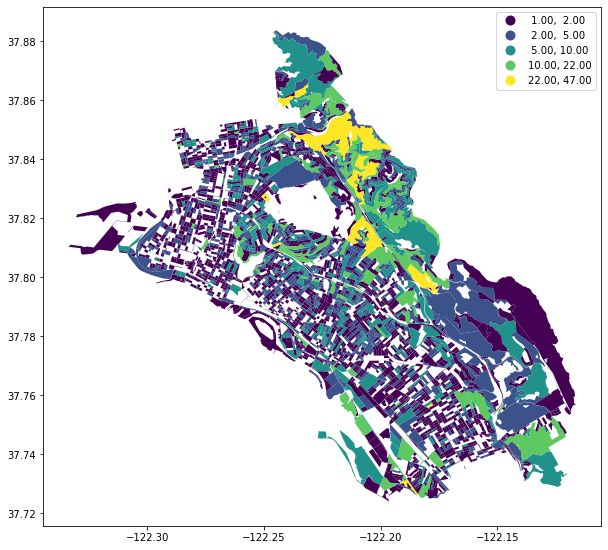

In [25]:
allblockcountgdf.plot(figsize=(10,10),
                 column='counts',
                 legend=True, 
                 scheme='NaturalBreaks')

In [26]:
allblockcountgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
gdf_web_mercator = allblockcountgdf.to_crs(epsg=3857)

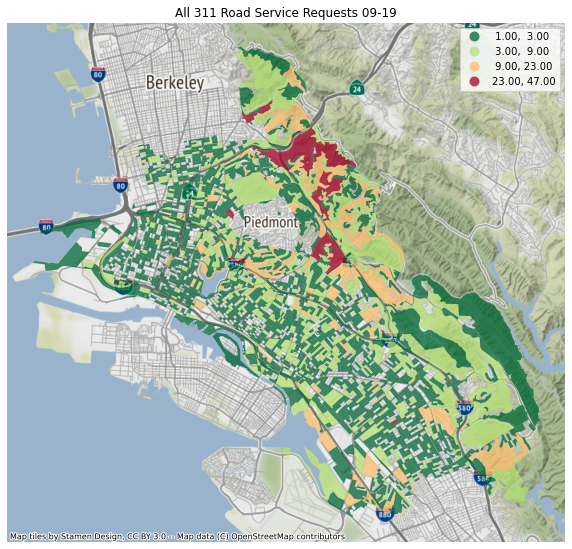

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator.plot(column='counts', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("All 311 Road Service Requests 09-19")
ctx.add_basemap(ax)

In [31]:
allblockcountgdf['counts'].describe()

count    3506.000000
mean        3.184256
std         3.585952
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        47.000000
Name: counts, dtype: float64

In [33]:
wq =  lps.weights.KNN.from_dataframe(allblockcountgdf,k=4)
wq.transform = 'r'

/opt/conda/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [34]:
allblockcountgdf['counts_lag'] = lps.weights.lag_spatial(wq, allblockcountgdf['counts'])

In [35]:
allblockcountgdf.sample(10)[['counts','counts_lag']]

,counts,counts_lag
1832,3,1.75
1553,3,1.50
2747,1,6.75
901,7,12.00
1593,3,3.25
928,1,1.50
3052,2,2.25
2852,5,2.25
3167,1,2.50
478,2,2.50


In [36]:
allblockcountgdf['counts_lag_diff'] = allblockcountgdf['counts'] - allblockcountgdf['counts_lag']

In [37]:
allblockcountgdf.sort_values(by='counts_lag_diff')

,statefp10,mtfcc10,uace10,name10,intptlat10,blockce10,awater10,funcstat10,aland10,geoid10,tractce10,intptlon10,ur10,countyfp10,geometry,counts,counts_lag,counts_lag_diff
2754,06,G5040,,Block 2011,+37.8342691,2011,0,S,13456,060014044002011,404400,-122.2131395,,001,"MULTIPOLYGON (((-122.21384 37.83342, -122.2141...",3,19.50,-16.50
1495,06,G5040,,Block 3018,+37.8168420,3018,0,S,62320,060014261003018,426100,-122.2127128,,001,"MULTIPOLYGON (((-122.21391 37.81401, -122.2139...",2,17.75,-15.75
1377,06,G5040,,Block 1012,+37.8458990,1012,0,S,24979,060014044001012,404400,-122.2183615,,001,"MULTIPOLYGON (((-122.21931 37.84503, -122.2193...",4,18.75,-14.75
446,06,G5040,,Block 2006,+37.8334488,2006,0,S,35698,060014045022006,404502,-122.2088848,,001,"MULTIPOLYGON (((-122.20988 37.83437, -122.2100...",4,18.75,-14.75
2498,06,G5040,,Block 3018,+37.8476572,3018,0,S,5515,060014044003018,404400,-122.2009731,,001,"MULTIPOLYGON (((-122.19999 37.84704, -122.2004...",1,15.50,-14.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,06,G5040,,Block 3019,+37.8452564,3019,0,S,269217,060014044003019,404400,-122.2015401,,001,"MULTIPOLYGON (((-122.19718 37.84507, -122.1970...",37,6.50,30.50
621,06,G5040,,Block 1015,+37.8472540,1015,25272,S,296701,060014043001015,404300,-122.2292738,,001,"MULTIPOLYGON (((-122.23421 37.84691, -122.2342...",33,1.50,31.50
2461,06,G5040,,Block 1000,+37.8260833,1000,0,S,55836,060014041021000,404102,-122.2484905,,001,"MULTIPOLYGON (((-122.24935 37.82870, -122.2491...",35,1.50,33.50
2236,06,G5040,,Block 2007,+37.8332164,2007,0,S,176161,060014045022007,404502,-122.2114417,,001,"MULTIPOLYGON (((-122.20938 37.83483, -122.2094...",47,9.75,37.25


/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


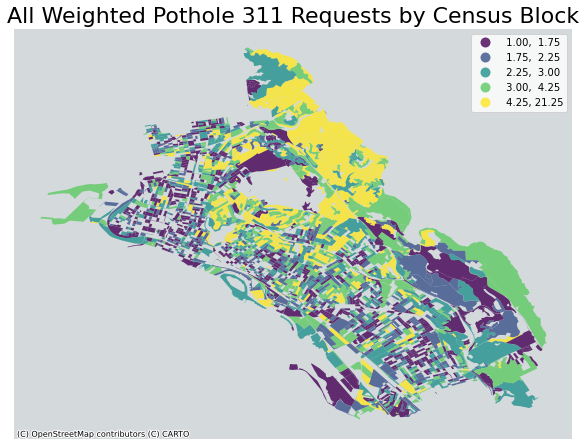

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

allblockcountgdf.plot(ax=ax,
         figsize=(10,10),
         column='counts_lag',
         legend=True,
         alpha=0.8,
         scheme='quantiles')

ax.axis('off')
ax.set_title('All Weighted Pothole 311 Requests by Census Block',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [42]:
y = allblockcountgdf.counts
moran = Moran(y, wq)
moran.I

0.13171387100058407

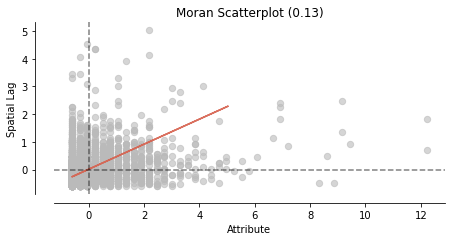

In [44]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

In [45]:
moran.p_sim

0.001

In [46]:
lisa = esda.moran.Moran_Local(y, wq)

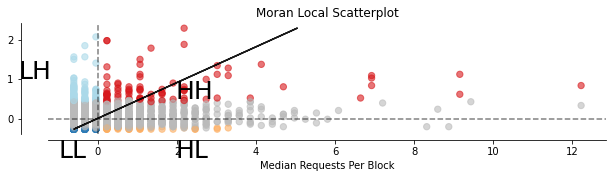

In [48]:
fig,ax = plt.subplots(figsize=(10,15))

moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel("Median Requests Per Block")
ax.set_ylabel("")

# add some labels
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

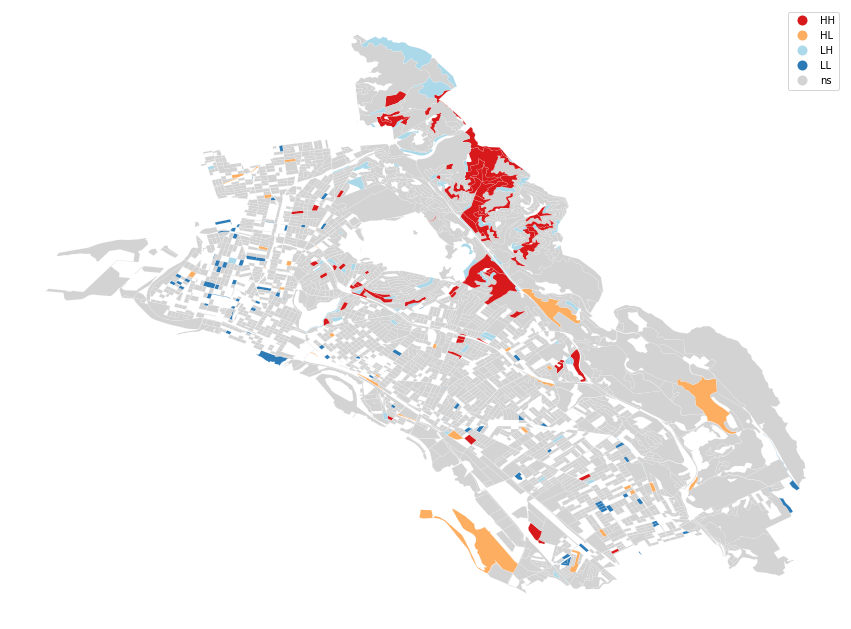

In [50]:
fig, ax = plt.subplots(figsize=(15,15))
lisa_cluster(lisa, allblockcountgdf, p=0.05, ax=ax)
plt.show()